# Анализ и подготовка данных

---

Если бегло взглянуть на полученные данные, сразу бросается в глаза несколько проблем:

* Необходимость кодирования (векторизации) имён пассажиров.
* Некоторые номера билетов содержат символы. Логично будет векторизовать символьную часть билета.
* Пропущенные значения возраста и номера кабины. Причем если пропущенных значений возраста не слишком много, то номер кабины пропущен у большинства пассажиров.
* Необходимость векторизовать порт посадки.

*P.S. В данном ноутбуке я провожу по большей части разведовательный анализ данных. Окончательные преобразования прописаны в классе TitanicDataset в файле* **`data_functions.py`**.

### Начнём с векторизации имён

---

*Для этого будем использовать модель мешка слов (Bag of words).*

In [6]:
import pandas as pd

# Считаем файл с данными
df = pd.read_csv('train.csv')
# Взглянем на данные!
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


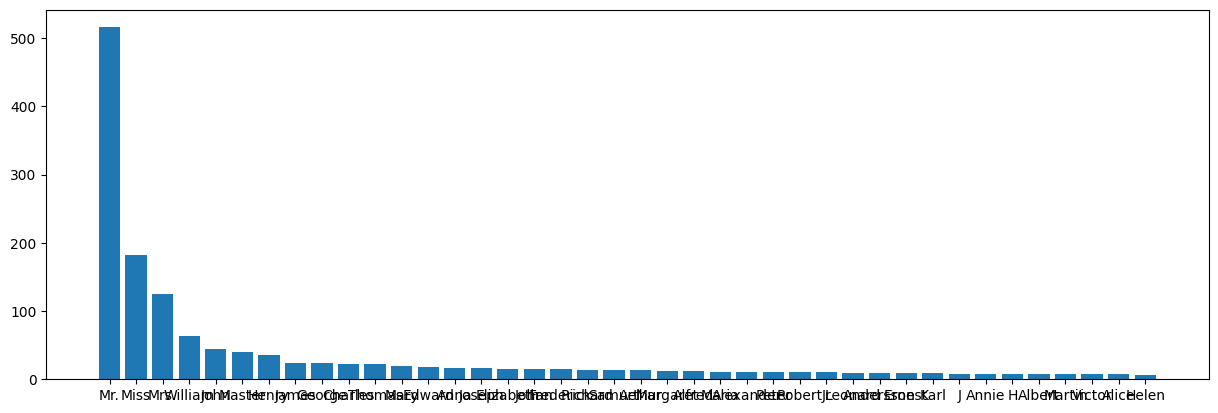

,0,1
0,Mr.,516
1,Miss,182
2,Mrs.,125
3,William,64
4,John,44
...,...,...
1524,Juozas,1
1525,Carrie,1
1526,Behr,1
1527,Howell,1


In [4]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Токенизируем имена
names = ' '.join(df.Name)
tokens_list_1 = nltk.word_tokenize(names)
tokens_list_2 = []

# Почистим от знаков пунктуации
for token in tokens_list_1:
    if token in ['.', ',', '"', '(', ')', "''", "``"]:
        continue
    else:
        tokens_list_2.append(token)

frequencies = dict(Counter(tokens_list_2))
frequencies_sorted = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))

# Визуализируем
fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.bar(list(frequencies_sorted.keys())[:40], sorted(list(frequencies.values()), reverse=True)[:40])
plt.show()

#Если взглянуть на таблицу частот, то можно заметить, что большая часть токенов появляется с частотой 4 и менее. При векторизации мы отсечем этот диапазон и ограничимся 85 токенами.
df_2 = pd.DataFrame(dict(Counter(frequencies_sorted)).items())
df_2

**Векторизуем! На основе модели мешка слов каждое имя мы преобразуем в вектор длиной 85.**

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

passenger_names = []
for name in df.Name:
    name_ = nltk.word_tokenize(name)
    name__ = []
    for token in name_:
        if token in ['.', ',', '"', '(', ')', "''", "``"]:
            continue
        else:
            name__.append(token)
    passenger_names.append(' '.join(name__))

counter = CountVectorizer(max_features=85)

vector_names = pd.DataFrame(counter.fit_transform(passenger_names).toarray(),
                            index=df.PassengerId,
                            columns = sorted(counter.vocabulary_.keys())
                            )
vector_names

,ada,albert,alexander,alfred,alice,andersson,anna,anne,annie,arthur,...,samuel,skoog,smith,sofia,thomas,van,victor,walter,william,williams
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Билеты и их символьная часть

---

Попробуем посмотреть на распределение символьных частей билетов и решим, есть ли смысл её векторизовать. СОсновной номер выделим отдельным признаком (это будет реализовано уже только в `data_functions.py`).

In [23]:
stringed_tickets = []

for ticket in df.Ticket:
    try:
        int(ticket)
    except:
        stringed_tickets.append(ticket)

len(stringed_tickets) #230 => точно имеет смысл с ними поработать

tokens_list_3 = nltk.word_tokenize(' '.join(stringed_tickets))
tokens_list_4 = []

#Почистим от номеров и знаков
for token in tokens_list_3:
    try:
        int(token)
    except:
        if token in ['.', ',', '"', '(', ')']:
            continue
        else:
            tokens_list_4.append(token)

frequencies_2 = dict(Counter(tokens_list_4))
frequencies_2_sorted = dict(sorted(frequencies_2.items(), key=lambda item: item[1], reverse=True))
pd.DataFrame(frequencies_2_sorted.items())

,0,1
0,PC,60
1,C.A,27
2,A/5,17
3,CA,14
4,STON/O,12
5,W./C,9
6,SOTON/O.Q,8
7,SOTON/OQ,7
8,STON/O2,6
9,A/4,6


Смысл векторизовать есть! Возьмем также токены, число которых 5 и более, таким образом билеты мы преобразуем в векторы длиной 14, и отдельным признаком будет номер билета. Векторизацию реализуем уже в `data_functions.py`

### Номера кают

---

Если немного изучить историю краха Титаника, становится очевидно, что номер каюты сыграл большую роль для возможности выжить. Пускай у нас есть данные лишь для небольшого числа пассажиров, но мы воспользуемся ими с толком. Векторизуем данные о каютах, используя все токены.

In [103]:
cabins = []
cabins_splitted = []

for cabin in df.Cabin:
    if isinstance(cabin, str):
        cabins.append(cabin)

for cabin in cabins:
    for c in cabin.split(' '):
        cabins_splitted.append(c)

cabins_freq = dict(Counter(cabins_splitted))
cabins_freq_sorted = dict(sorted(cabins_freq.items(), key=lambda item: item[1], reverse=True))
pd.DataFrame(cabins_freq_sorted.items())

,0,1
0,G6,4
1,C23,4
2,C25,4
3,C27,4
4,F,4
...,...,...
156,E17,1
157,A24,1
158,C50,1
159,B42,1


In [34]:
# Очистим от NaNов
clear_cabins = []
for cabin in df.Cabin:
    if isinstance(cabin, str):
        clear_cabins.append(cabin)
    else:
        clear_cabins.append('')


counter_2 = CountVectorizer(max_features=161)

cabin_vectors = pd.DataFrame(counter_2.fit_transform(clear_cabins).toarray(),
                            index=df.PassengerId,
                            columns = sorted(counter_2.vocabulary_.keys())
                            )
cabin_vectors

,a10,a14,a16,a19,a20,a23,a24,a26,a31,a32,...,e69,e77,e8,f2,f33,f38,f4,g6,g63,g73
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Пропущенные возраста

---

В случае с возрастом, попробуем опираться на остальные данные для пассажира, чтобы восстановить его возраст. Характерными для возраста будут `sibsp` и `parch`, поэтому для отсутствующих возрастов возьмем средний возраст пассажиров с такими же значениями sibsp и parch.

In [92]:
ids_with_age = []
ids_no_age = []
for i, id in enumerate(df.PassengerId):
    if df.Age[i] > 0:
        ids_with_age.append(id)
    else:
        ids_no_age.append(id)

len(ids_no_age) #177

def find_mean_age(sibsp, parch):
    accum_age = 0
    count = 0
    for i, pasid in enumerate(df.PassengerId):
        if df.SibSp[i] == sibsp and df.Parch[i] == parch:
            if df.Age[i] > 0:
                accum_age += df.Age[i]
            count += 1

    if accum_age == 0:
        for i, pasid in enumerate(df.PassengerId):
            if df.SibSp[i] == sibsp or df.Parch[i] == parch:
                if df.Age[i] > 0:
                    accum_age += df.Age[i]
                count += 1

    return round(accum_age/count, 1)

restored_ages = {}

for id in ids_no_age:
    index = int(id - 1)
    restored_ages[id] = find_mean_age(df.SibSp[index], df.Parch[index])

pd.DataFrame(restored_ages.items())

,0,1
0,6,24.2
1,18,24.2
2,20,24.2
3,27,24.2
4,29,24.2
...,...,...
172,860,24.2
173,864,13.5
174,869,24.2
175,879,24.2


# Итог

---

Нам удалось векторизовать данные, требующие этого, а именно: имя пассажира, номер билета, номер каюты. Векторизации также требует порт отправки, но с ним все просто, все данные присутствуют, а портов всего 3.
Нам удалось восстановить недостающие данные возраста пассажира, основываясь на данных о его попутчиках.

Следующим этапом будет разработка `data_functions.py`, где все рассмотренные способы векторизации будут применены, созданы классы и функции для подготвки данных к использованию в алгоритмах ML. Из алгоритмов я буду концентрироваться на нейронных сетях на базе **pyTorch**, однако также опробую несколько алгоритмов ML из пакета **SCIKIT-Learn**.

In [9]:
a = pd.read_csv('test.csv')
a

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
a

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
